In [19]:
# Complete random movements

import gym
import gym_examples
# import numpy as np

# Create the environment
env = gym.make('gym_examples/GridWorld-v0', size=4)

# Reset the environment to start a new episode
state = env.reset()
agent_location = env.get_agent_location()
target_location = env.get_target_location()
print(f"Agent's INITIAL Location: {agent_location}, Target Location: {target_location}")
# Initialize done to False
done = False

# Loop until the episode ends
while not done:
    # Select an action randomly
    action = env.action_space.sample()
    
    # Apply the action to the environment
    next_state, reward, done, truncated, info = env.step(action)
    
    # Optionally, render the environment to visualize it
    # env.render()
    agent_location = env.get_agent_location()
    target_location = env.get_target_location()
    print(f"Agent's Location: {agent_location}, Target Location: {target_location}")

    # Update state
    state = next_state

# Close the environment
env.close()

print("Episode finished!")


Agent's INITIAL Location: [3 0], Target Location: [0 0]
Agent's Location: [3 0], Target Location: [0 0]
Agent's Location: [2 0], Target Location: [0 0]
Agent's Location: [1 0], Target Location: [0 0]
Agent's Location: [1 0], Target Location: [0 0]
Agent's Location: [1 0], Target Location: [0 0]
Agent's Location: [1 0], Target Location: [0 0]
Agent's Location: [1 0], Target Location: [0 0]
Agent's Location: [1 1], Target Location: [0 0]
Agent's Location: [2 1], Target Location: [0 0]
Agent's Location: [2 2], Target Location: [0 0]
Agent's Location: [1 2], Target Location: [0 0]
Agent's Location: [1 2], Target Location: [0 0]
Agent's Location: [2 2], Target Location: [0 0]
Agent's Location: [3 2], Target Location: [0 0]
Agent's Location: [3 2], Target Location: [0 0]
Agent's Location: [3 1], Target Location: [0 0]
Agent's Location: [3 1], Target Location: [0 0]
Agent's Location: [2 1], Target Location: [0 0]
Agent's Location: [3 1], Target Location: [0 0]
Agent's Location: [3 1], Target 

/Users/andyyang/Desktop/DS598 Reinforcement Learning/gym-examples/.env/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [40]:
# Deep Q Network
import gym 
import gym_examples
from dqn import Agent
import numpy as np

env = gym.make('gym_examples/GridWorld-v0', size=4)
agent = Agent(gamma=0.9, epsilon=0.5, batch_size=10, n_actions=4, eps_end=0.01, input_dims=[16], lr=0.003)
scores, eps_hist,avg_scores = [], [], []
n_games = 10

for i in range(n_games):
    score = 0
    done=False
    observation = env.reset()[0]['agent']
    counter = 0

    while not done:
        rewards = []
        agent_location = env.get_agent_location()
        print(f"Agent's Location: {agent_location}")
        # choose an action based on current state of env
        action = agent.choose_action(observation)
        observation_, reward, done, truncated, info = env.step(action) #observation_ is just next_state
        observation_ = observation_['agent']
        score += reward
        rewards
        agent.store_transitions(observation, action, reward, observation_, done)
        agent.learn()
        observation = observation_
        # end of an episode
        counter += 1
        print('---')

    scores.append(score)
    eps_hist.append(agent.epsilon)
    print('end game')

    avg_score = np.mean(scores)
    
    avg_scores.append(avg_score)
    


Agent's Location: [3 0]
state: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
four actions: tensor([0.0623, 0.0256, 0.0519, 0.0224], grad_fn=<ViewBackward0>)
selected action: 0
---
Agent's Location: [3 0]
state: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
four actions: tensor([0.0623, 0.0256, 0.0519, 0.0224], grad_fn=<ViewBackward0>)
selected action: 0
---
Agent's Location: [3 0]
randomly selected action: 1
---
Agent's Location: [3 1]
state: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
four actions: tensor([ 0.0818, -0.0340,  0.0311,  0.0175], grad_fn=<ViewBackward0>)
selected action: 0
---
Agent's Location: [3 1]
randomly selected action: 1
---
Agent's Location: [3 2]
state: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
four actions: tensor([ 0.0631, -0.0082,  0.0678,  0.0325], grad_fn=<ViewBackward0>)
selected action: 2
---
Agent's Location: [2 2]
randomly selected action: 0


/Users/andyyang/Desktop/DS598 Reinforcement Learning/gym-examples/.env/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Q_TARGET: tensor([-1.7125, -2.1566, -2.1566, -1.7125, -1.8451, -1.7125, -1.7125, -1.9171,
        -2.1566, -1.7125], grad_fn=<AddBackward0>)
LOSS: 0.2611270248889923
---
Agent's Location: [1 0]
state: tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
four actions: tensor([-1.9914, -2.2748, -1.7045, -0.8246], grad_fn=<ViewBackward0>)
selected action: 3
Q_EVAL: tensor([-2.1984, -2.2282, -1.0482, -2.6886, -2.1984, -1.0482, -0.8246, -2.1984,
        -1.6459, -1.6012], grad_fn=<IndexBackward0>)
Q_TARGET: tensor([-2.2091, -2.2091, -1.9434, -2.6462, -2.2091, -1.9434, -1.7421, -2.2091,
        -2.2091, -1.7067], grad_fn=<AddBackward0>)
LOSS: 0.27753958106040955
---
Agent's Location: [1 0]
state: tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
four actions: tensor([-2.0147, -2.2752, -1.7266, -0.8618], grad_fn=<ViewBackward0>)
selected action: 3
Q_EVAL: tensor([-2.2752, -2.2308, -2.0550, -2.7164, -0.3181, -1.0883, -0.8618, -2.2308,
        -1.7266,

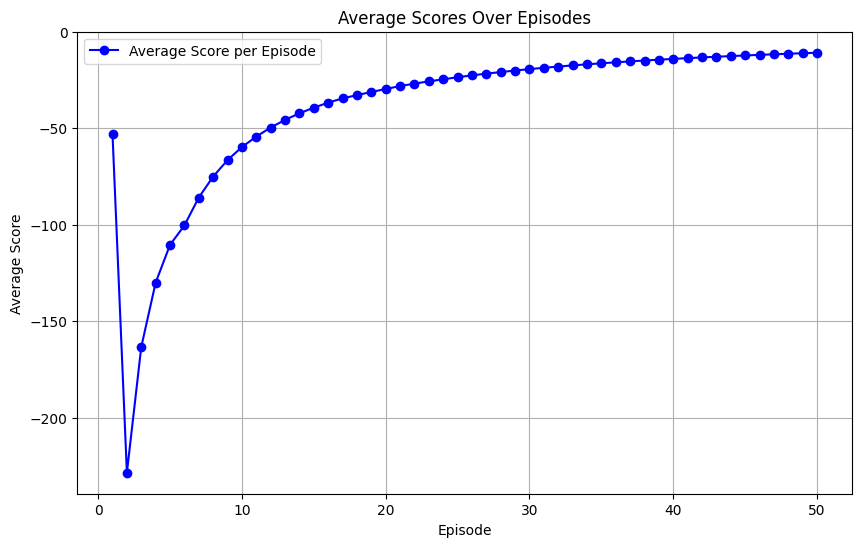

In [42]:
import matplotlib.pyplot as plt

# Assuming avg_scores is filled with the average score after each game
episodes = list(range(1, n_games + 1))  # Creating a list of episode numbers

plt.figure(figsize=(10, 6))
plt.plot(episodes, avg_scores, marker='o', linestyle='-', color='b', label='Average Score per Episode')
plt.title('Average Scores Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `all_rewards` is a list of lists, where each inner list contains the rewards per episode for a single run.
# Let's say you have 10 runs, and each run is 100 episodes long.
all_rewards = scores  # Example data

# Calculate the mean and standard deviation across runs for each episode
mean_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)
episodes = np.arange(len(mean_rewards))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(episodes, mean_rewards, label='Mean Rewards')
plt.fill_between(episodes, mean_rewards - std_rewards, mean_rewards + std_rewards, alpha=0.2)
plt.title('Learning Curve over 10 Runs')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.legend()
plt.grid()
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (50,) + inhomogeneous part.

In [24]:
i

1

In [37]:
np.random.random()

0.9873709528509469

In [18]:
a = np.random.choice([1,2,3], 2, replace=False)
a

array([3, 2])

In [19]:
np.arange(2, dtype=np.int32)

array([0, 1], dtype=int32)

In [21]:
memory = np.array([1, 2, 3, 4, 5])

In [23]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

class DeepQNetwork(nn.Module):
    def __init__(self, lr, input_dims, fc1_dims, fc2_dims, n_actions):
        super(DeepQNetwork, self).__init__()
        self.input_dims = input_dims
        self.fc1_dims = fc1_dims
        self.fc2_dims = fc2_dims
        self.n_actions = n_actions
        self.fc1 = nn.Linear(*self.input_dims, self.fc1_dims)
        self.fc2 = nn.Linear(self.fc1_dims, self.fc2_dims)
        self.fc3 = nn.Linear(self.fc2_dims, self.n_actions)
        self.optimizer = optim.Adam(self.parameters(), lr=lr)
        self.loss = F.mse_loss
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        actions = self.fc3(x)

        return actions

In [24]:
net = DeepQNetwork(lr =0.003, n_actions=4, input_dims=[16], fc1_dims=128, fc2_dims=128)

In [40]:
w = net.forward(T.tensor([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0], dtype=T.float32))
T.argmax(w).item()

2

In [34]:
memo = T.tensor([
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]], dtype=T.float32
)

In [36]:
actions = net.forward(memo)

In [42]:
actions

tensor([[-0.0018,  0.0231,  0.0456, -0.0359],
        [-0.0359,  0.0097,  0.0867, -0.0367],
        [-0.0359,  0.0097,  0.0867, -0.0367],
        [ 0.0365,  0.0507,  0.0973, -0.0360],
        [-0.0475,  0.0321,  0.0967, -0.0469]], grad_fn=<AddmmBackward0>)

In [41]:
T.max(actions, dim=1)[0]

tensor([0.0456, 0.0867, 0.0867, 0.0973, 0.0967], grad_fn=<MaxBackward0>)